In [3]:
 pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install kagglehub

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\slrob\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
data_file = pd.read_csv(path+"/StudentsPerformance.csv")
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95
996,male,997,group C,high school,free/reduced,none,62,55,55
997,female,998,group C,high school,free/reduced,completed,59,71,65
998,female,999,group D,some college,standard,completed,68,78,77


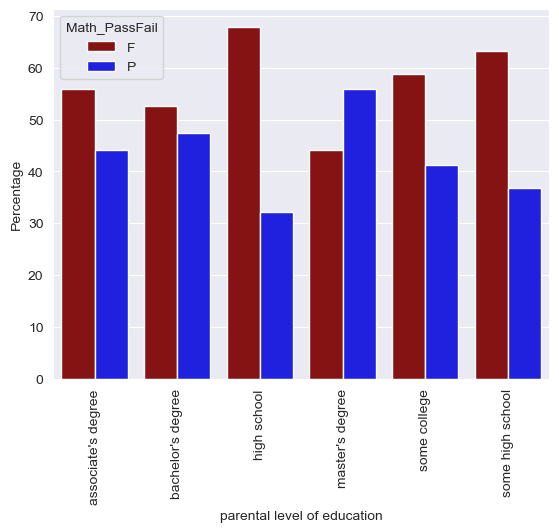

In [328]:
passmark=70
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Math_PassFail"] = np.where(data_file["math score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Math_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Math_PassFail",
    data=normalized_counts,
    palette=["#990000","#0000FF"],
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.show()

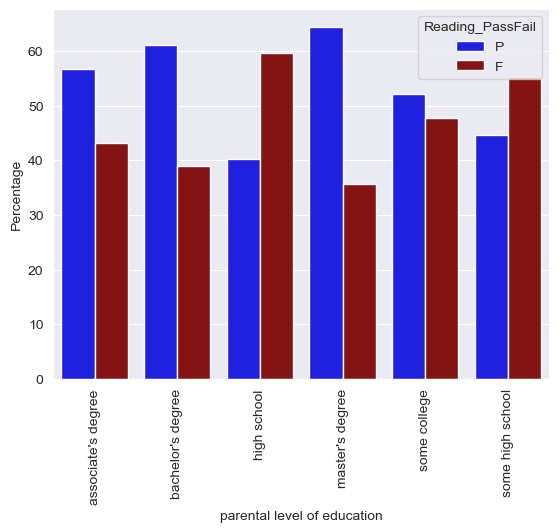

In [324]:
# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Reading_PassFail"] = np.where(data_file["reading score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Reading_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Reading_PassFail",
    data=normalized_counts,
    palette=["#0000FF","#990000"],
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")
plt.show()

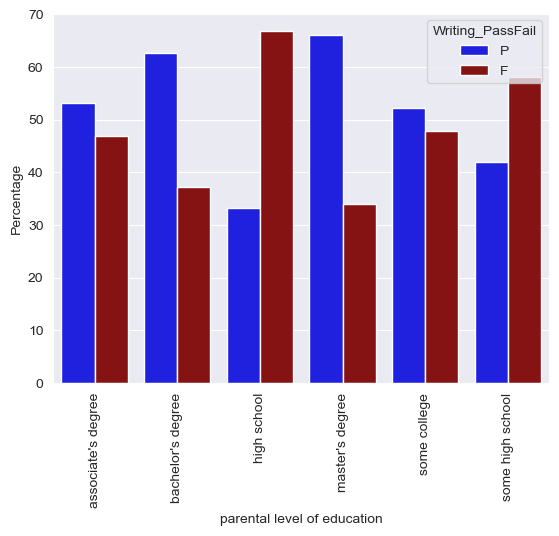

In [322]:

# Assuming `data_file` is your DataFrame and `passmark` is defined
data_file["Writing_PassFail"] = np.where(data_file["writing score"] < passmark, "F", "P")

# Calculate normalized percentages
normalized_counts = (
    data_file.groupby("parental level of education")["Writing_PassFail"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("percentage")
    .reset_index()
)

# Plot normalized percentages
sns.barplot(
    x="parental level of education",
    y="percentage",
    hue="Writing_PassFail",
    data=normalized_counts,
    palette=["#0000FF","#990000"],
)
plt.xticks(rotation=90)
plt.ylabel("Percentage")

plt.show()

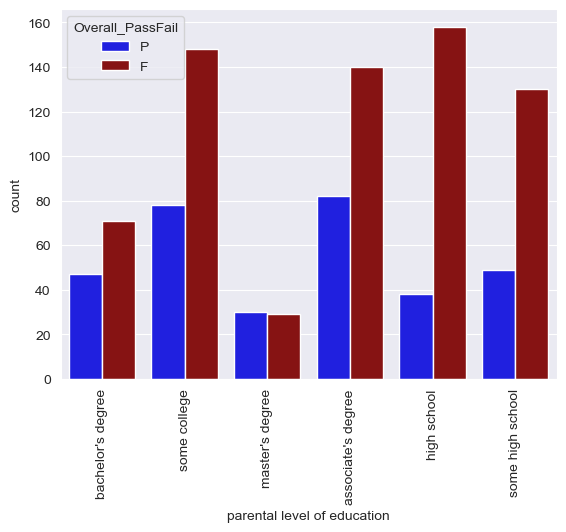

In [318]:
data_file["Overall_PassFail"] = data_file.apply(lambda x: "F" if x["Math_PassFail"]== 'F' 
                                     or x["Reading_PassFail"]== 'F' or x["Writing_PassFail"]== 'F'
                                    else 'P' , axis =1)
p=sns.countplot(x="parental level of education",hue="Overall_PassFail",data=data_file,palette=["#0000FF","#990000"]) 
# we compare it to hue
plt.xticks(rotation=90)
plt.show()

In [220]:
#df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
data_file['average'] = (data_file['math score'] + data_file['reading score'] + data_file['writing score'])/3

In [222]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
target_encoder = preprocessing.TargetEncoder()
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   student number               1000 non-null   int64  
 2   race/ethnicity               1000 non-null   object 
 3   parental level of education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test preparation course      1000 non-null   object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
 9   Math_PassFail                1000 non-null   object 
 10  Reading_PassFail             1000 non-null   object 
 11  Writing_PassFail             1000 non-null   object 
 12  Overall_PassFail             1000 non-null   object 
 13  average            

In [224]:
data_file

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassFail,Reading_PassFail,Writing_PassFail,Overall_PassFail,average
0,female,1,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72.666667
1,female,2,group C,some college,standard,completed,69,90,88,F,P,P,F,82.333333
2,female,3,group B,master's degree,standard,none,90,95,93,P,P,P,P,92.666667
3,male,4,group A,associate's degree,free/reduced,none,47,57,44,F,F,F,F,49.333333
4,male,5,group C,some college,standard,none,76,78,75,P,P,P,P,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,996,group E,master's degree,standard,completed,88,99,95,P,P,P,P,94.000000
996,male,997,group C,high school,free/reduced,none,62,55,55,F,F,F,F,57.333333
997,female,998,group C,high school,free/reduced,completed,59,71,65,F,P,F,F,65.000000
998,female,999,group D,some college,standard,completed,68,78,77,F,P,P,F,74.333333


In [226]:
CorrelationData=data_file[['math score','reading score','writing score']].corr()
CorrelationData

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [228]:
data_file.shape
df_encoded = data_file.copy()
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Create a copy of the DataFrame to encode
df_encoded = data_file.copy()

# Label encode binary categorical columns
binary_cols = ['gender', 'lunch', 'test preparation course', 'Math_PassFail', 'Reading_PassFail', 'Writing_PassFail', 'Overall_PassFail']
label_encoder = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-hot encode non-binary categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['race/ethnicity', 'parental level of education'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['math score', 'reading score', 'writing score', 'average']
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded = df_encoded.drop(columns=['student number'])


print(df_encoded.head())
print(df_encoded.info())


   gender  lunch  test preparation course  math score  reading score  \
0       0      1                        1    0.390024       0.193999   
1       0      1                        0    0.192076       1.427476   
2       0      1                        1    1.577711       1.770109   
3       1      0                        1   -1.259543      -0.833899   
4       1      1                        1    0.653954       0.605158   

   writing score  Math_PassFail  Reading_PassFail  Writing_PassFail  \
0       0.391492              1                 1                 1   
1       1.313269              0                 1                 1   
2       1.642475              1                 1                 1   
3      -1.583744              0                 0                 0   
4       0.457333              1                 1                 1   

   Overall_PassFail   average  race/ethnicity_group B  race/ethnicity_group C  \
0                 1  0.343574                    True      

In [230]:
# Define features (X) and labels (y)
X = df_encoded.drop(columns=['Overall_PassFail'])  # Assuming 'Overall_PassFail' is the target
y = df_encoded['Overall_PassFail']

# Split into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


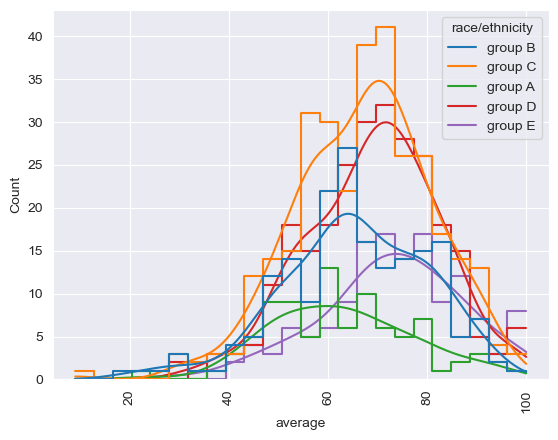

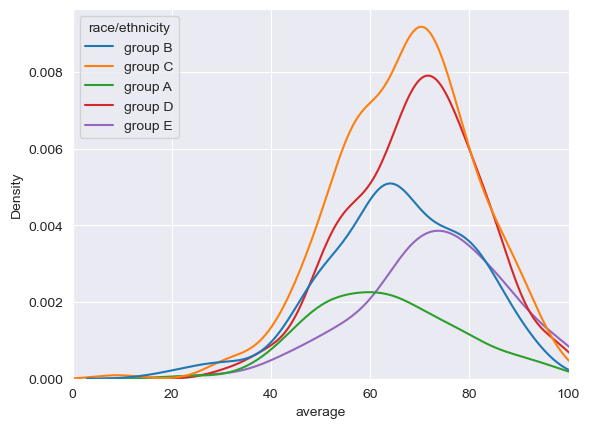

In [366]:

sns.histplot(x='average', kde=True,element='step',fill=False, data=data_file,hue="race/ethnicity")
plt.xticks(rotation=90)
plt.show()
sns.kdeplot(x='average',data=data_file,hue="race/ethnicity")
plt.xlim(0,100)
#plt.xticks(rotation=90)
plt.show()

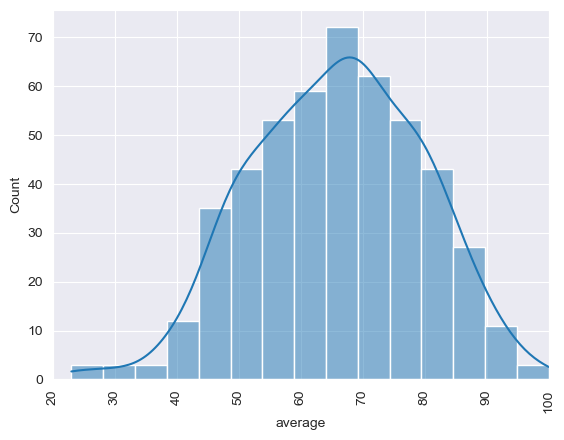

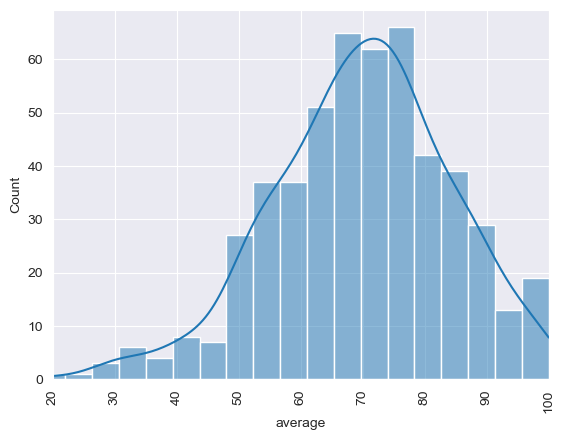

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='average', kde=True, data=data_file[data_file.gender=='male'])
plt.xticks(rotation=90)
plt.xlim(20,100)
plt.show()
sns.histplot(x='average',kde=True, data=data_file[data_file.gender=='female'])
plt.xticks(rotation=90)
plt.xlim(20,100)
plt.show()

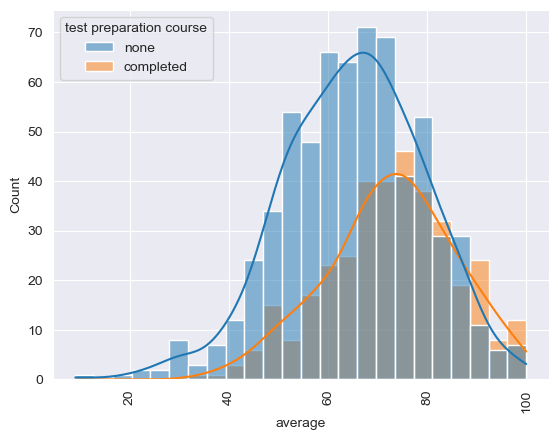

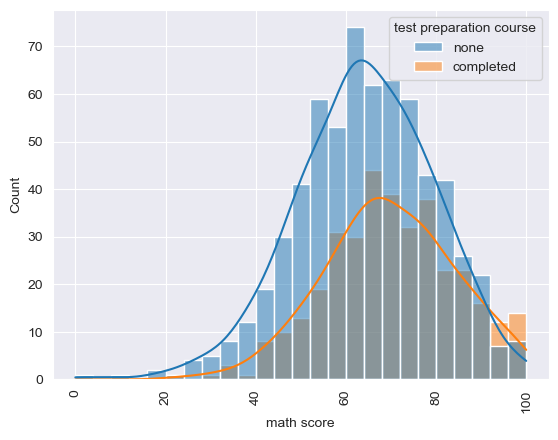

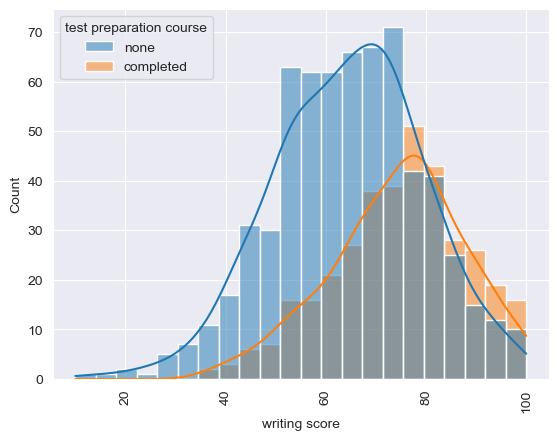

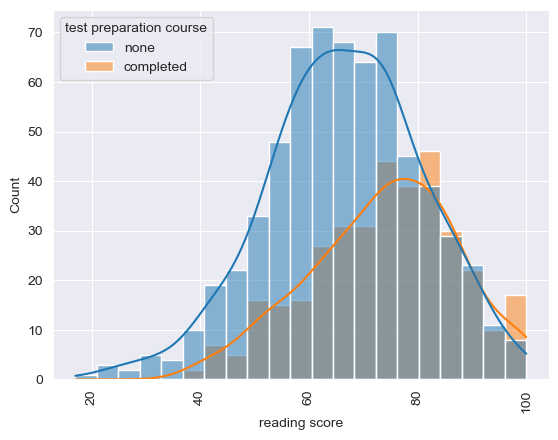

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [348]:
sns.histplot(x='average', kde=True, data=data_file, hue='test preparation course')
plt.xticks(rotation=90)
plt.show()
sns.histplot(x='math score', kde=True, data=data_file, hue='test preparation course')
plt.xticks(rotation=90)
plt.show()
sns.histplot(x='writing score', kde=True, data=data_file, hue='test preparation course')
plt.xticks(rotation=90)
plt.show()
sns.histplot(x='reading score', kde=True, data=data_file, hue='test preparation course')
plt.xticks(rotation=90)
plt.show()
print(data_file['test preparation course'].value_counts())

In [350]:
print(data_file['race/ethnicity'].value_counts())

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


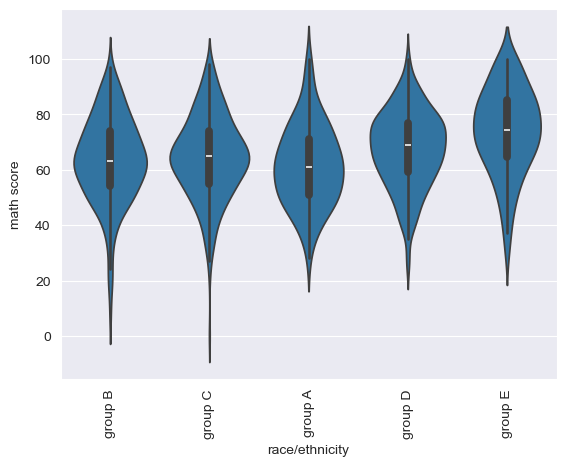

In [270]:
sns.violinplot(x='race/ethnicity', y='math score', data=data_file)
plt.xticks(rotation=90)
plt.show()

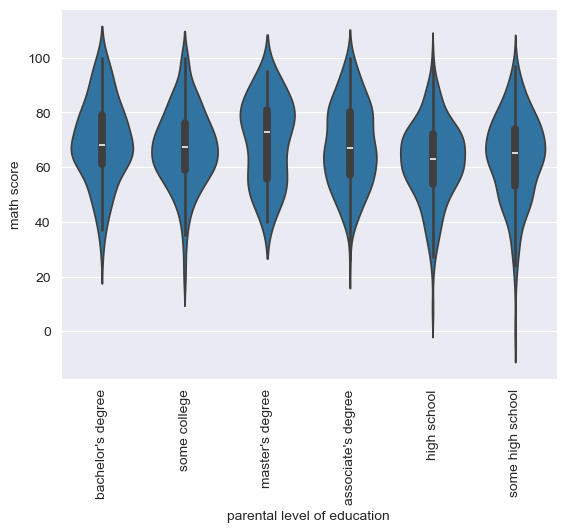

In [276]:
sns.violinplot(x='parental level of education', y='math score', data=data_file)
plt.xticks(rotation=90)
plt.show()

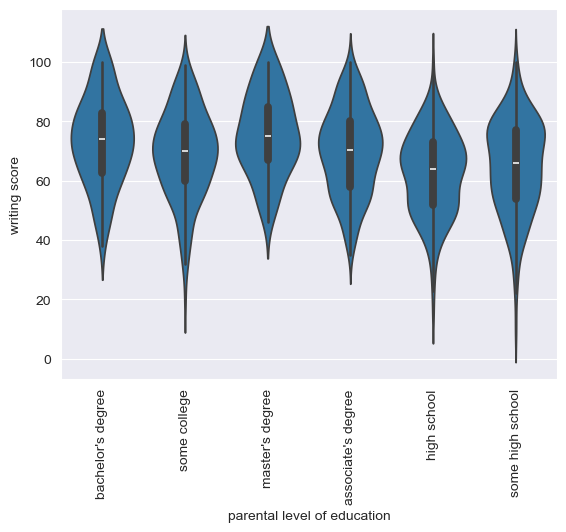

In [278]:
sns.violinplot(x='parental level of education', y='writing score', data=data_file)
plt.xticks(rotation=90)
plt.show()

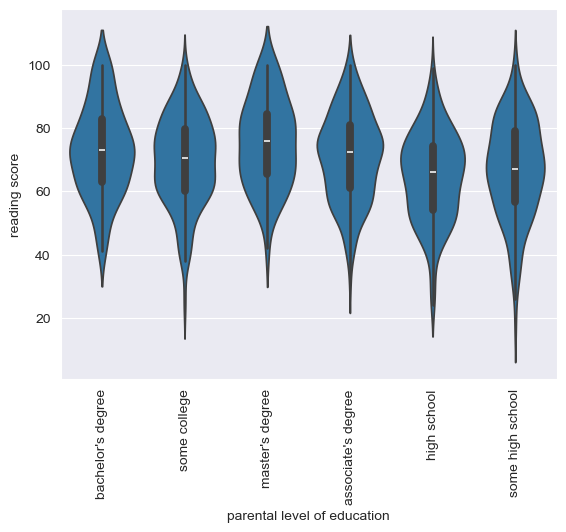

In [280]:
sns.violinplot(x='parental level of education', y='reading score', data=data_file)
plt.xticks(rotation=90)
plt.show()

In [160]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

df = pd.read_csv(path+"/StudentsPerformance.csv")
df.head()

,gender,student number,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,group B,bachelor's degree,standard,none,72,72,74
1,female,2,group C,some college,standard,completed,69,90,88
2,female,3,group B,master's degree,standard,none,90,95,93
3,male,4,group A,associate's degree,free/reduced,none,47,57,44
4,male,5,group C,some college,standard,none,76,78,75


In [162]:
X = df.drop(columns=['math score'],axis=1)
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [163]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [164]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 20), (200, 20))

In [165]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [264]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2137
- Mean Absolute Error: 0.1684
- R2 Score: 0.7927
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2098
- Mean Absolute Error: 0.1685
- R2 Score: 0.7941


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4693
- Mean Absolute Error: 0.4405
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4628
- Mean Absolute Error: 0.4345
- R2 Score: -0.0014


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2137
- Mean Absolute Error: 0.1687
- R2 Score: 0.7926
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2102
- Mean Absolute Error: 0.1692
- R2 Score: 0.7935


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0775
- Mean Absolute Error: 0.0205
- R2 Score: 0.9728
----------------------

In [167]:
#this replicates above. Same outcome
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


In [168]:
X_write = df.drop(columns=['writing score'],axis=1)
yW = df['writing score']
# Create Column Transformer with 3 types of transformers
numW_features = X_write.select_dtypes(exclude="object").columns
catW_features = X_write.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, catW_features),
         ("StandardScaler", numeric_transformer, numW_features),        
    ]
)

X_write = preprocessor.fit_transform(X_write)

# separate dataset into train and test
from sklearn.model_selection import train_test_split
XW_train, XW_test, yW_train, yW_test = train_test_split(X_write,yW,test_size=0.2,random_state=42)
XW_train.shape, XW_test.shape

((800, 20), (200, 20))

In [266]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(XW_train, yW_train) # Train model

    # Make predictions
    y_train_pred = model.predict(XW_train)
    y_test_pred = model.predict(XW_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(yW_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(yW_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3683
- Mean Absolute Error: 2.7043
- R2 Score: 0.9501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8715
- Mean Absolute Error: 3.2117
- R2 Score: 0.9378


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5135
- Mean Absolute Error: 3.6478
- R2 Score: 0.9104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9256
- Mean Absolute Error: 3.8964
- R2 Score: 0.8993


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3683
- Mean Absolute Error: 2.7048
- R2 Score: 0.9501
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8711
- Mean Absolute Error: 3.2113
- R2 Score: 0.9378


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.2521
- Mean Absolute Error: 3.4712
- R2 Score: 0.9205
-----------------------

In [170]:
#this replicates above. Same outcome
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(XW_train, yW_train)
y_pred = lin_model.predict(XW_test)
score = r2_score(yW_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.78


In [268]:
X_read = df.drop(columns=['reading score'],axis=1)
yR = df['reading score']
# Create Column Transformer with 3 types of transformers
numR_features = X_read.select_dtypes(exclude="object").columns
catR_features = X_read.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, catR_features),
         ("StandardScaler", numeric_transformer, numR_features),        
    ]
)

X_read = preprocessor.fit_transform(X_read)

# separate dataset into train and test
from sklearn.model_selection import train_test_split
XR_train, XR_test, yR_train, yR_test = train_test_split(X_read,yR,test_size=0.2,random_state=42)
XR_train.shape, XR_test.shape

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(max_depth=3),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(XR_train, yR_train) # Train model

    # Make predictions
    y_train_pred = model.predict(XR_train)
    y_test_pred = model.predict(XR_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(yR_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(yR_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.5054
- Mean Absolute Error: 2.8279
- R2 Score: 0.9412
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.6932
- Mean Absolute Error: 2.9928
- R2 Score: 0.9397


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.6537
- Mean Absolute Error: 0.5263
- R2 Score: 0.9980
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7310
- Mean Absolute Error: 0.5890
- R2 Score: 0.9976


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.1287
- Mean Absolute Error: 3.2700
- R2 Score: 0.9184
-----------------------